In [1]:
import pandas as pd
import numpy as np
import pickle 
import torch
from scripts.visualisation import plot_cpg_reconstruction
import matplotlib.pyplot as plt

C:\Users\luki_\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load test data

In [2]:
PATH_data = "data"
PATH_results = "logs"

with open(os.path.join(PATH_data, "chr22_overlap_test_methyl_array.pkl"), "rb") as f: test_dataset = pickle.load(f) #
test_tensor = torch.tensor(test_dataset["beta"].values, dtype=torch.float32)

# Train model

In [13]:
!python train_VAE.py --name VAE_ReLU_noBatchNorm \
                    --train_file chr22_overlap_train_methyl_array.pkl \
                    --val_file chr22_overlap_val_methyl_array.pkl \
                    --hidden_layer_encoder_topology 2000 500 \
                    --latentSize 50 \
                    --learning_rate 1e-04 \
                    --n_epochs 500

reading data
methVAE(
  (encoder): Sequential(
    (0): Linear(in_features=4671, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=50, bias=True)
    (5): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2000, out_features=4671, bias=True)
    (5): Sigmoid()
  )
)
		Logging to logs/VAE_ReLU_noBatchNorm/checkpoint
cuda:0
Epoch: 1
Training Loss: 202605.283
Validation Loss: 16615.973
Epoch: 2
Training Loss: 68234.689
Validation Loss: 4293.265
Epoch: 3
Training Loss: 19488.546
Validation Loss: 2088.201
Epoch: 4
Training Loss: 11409

C:\Users\luki_\anaconda3\envs\pytorch\lib\site-packages\torch\jit\_trace.py:983: TracerWarning: Trace had nondeterministic nodes. Did you forget call .eval() on your model? Nodes:
	%z : Float(8, 50, strides=[50, 1], requires_grad=0, device=cuda:0) = aten::randn(%93, %94, %95, %96, %97) # b:\Sonjas_secrets\methVAE_chr22\models\autoencoder.py:97:0
This may cause errors in trace checking. To disable trace checking, pass check_trace=False to torch.jit.trace()
  _check_trace(
C:\Users\luki_\anaconda3\envs\pytorch\lib\site-packages\torch\jit\_trace.py:983: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 37332 / 37368 (99.9%)
Greatest absolute difference: 0.05599755048751831 at index (1, 2199) (up to 1e-05 allowed)
Greatest relative difference: 0.6766415267416902 at index (6, 1865) (up to 1e-05 allowed)

  _check_trace(


# Reconstruction and Latent Space

In [49]:
name="VAE_ReLU"
model = torch.load(f"logs/{name}/checkpoint/trainedModel.pth", map_location=torch.device("cuda"))
model

methVAE(
  (encoder): Sequential(
    (0): Linear(in_features=4671, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=50, bias=True)
    (5): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2000, out_features=4671, bias=True)
    (5): Sigmoid()
  )
)

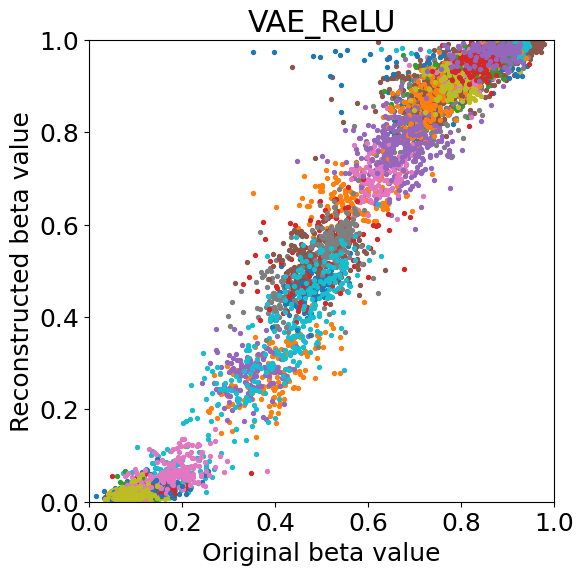

In [50]:
plot_cpg_reconstruction(model, test_tensor.cuda(), title=name)

In [51]:
with torch.no_grad():
    latSpace = model.generate_embedding(test_tensor.cuda()).cpu().detach().numpy()
    mean, var = model.encode(test_tensor.cuda())
    mean = mean.cpu().detach().numpy()
    hidden = model.get_hidden(test_tensor.cuda()).cpu().detach().numpy()

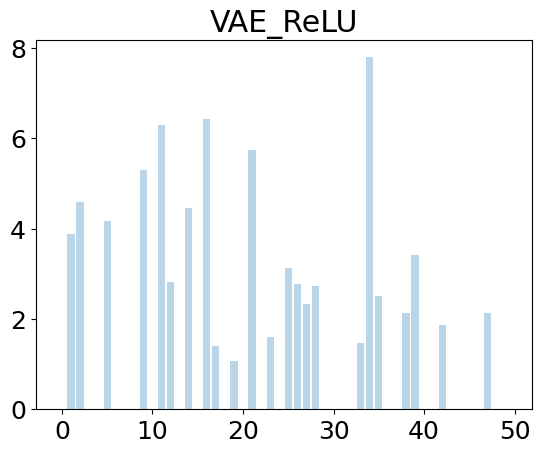

In [52]:
fig, ax = plt.subplots()
#ax.bar(range(mean.shape[1]), np.median(mean,axis=0))
ax.bar(range(hidden.shape[1]), np.median(hidden,axis=0), alpha=0.3)
ax.set_title(name)
plt.show()

In [14]:
model

methVAE(
  (encoder): Sequential(
    (0): Linear(in_features=4671, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=50, bias=True)
    (5): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2000, out_features=4671, bias=True)
    (5): Sigmoid()
  )
)

In [25]:
bn = torch.nn.BatchNorm1d(50, device="cuda")
bn(model.get_hidden(test_tensor.cuda()+5))

tensor([[ 0.0000,  0.0000, -1.3208,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.2996,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.3371,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.1434,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.5729,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -1.1885,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<NativeBatchNormBackward0>)